
#PyTorch Basics: Deep Learning & Data Analysis

**Over the next few weeks we will learn the basics of Deep Learning using pytorch**

Do the coding exercises below, add comments and markdown explanations, and upload the resulting notebook together with the collab corresponding to mini project 2.

This notebook covers:

1. Problem setup & data splits (train/val/test)  
2. PyTorch tensors, datasets, and dataloaders  
3. Models: linear regression, MLP for classification, CNN
4. Losses, regularization (L2/weight decay & dropout), and metrics  
5. Optimization: gradient descent w/ `torch.optim`   
6. Experiment tracking: random seeds, reproducibility, and plotting learning curves  

> This notebook uses only standard libraries available in Colab: `torch`, `numpy`, `matplotlib`, and the `sklearn` library for toy data.


In [ ]:
#@title Imports & reproducibility helpers
import math, random, os, time
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from typing import Tuple, Dict, Any
import torch.nn as nn

try:
    from sklearn.datasets import make_moons, make_circles
    _HAS_SKLEARN = True
except Exception as e:
    print("scikit-learn not found; synthetic dataset generators will fall back to torch-only.")
    _HAS_SKLEARN = False

import matplotlib.pyplot as plt

def set_seed(seed: int = 123):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(7)
DEVICE


'cpu'

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

##-1) Tensors

Tensors in pytorch are very similar to numpy arrays

1. 🧩 How do we construct a tensor?

Say we want to construct the following tensor using torch functions:

```python
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

2. 🧩 What's the size of this tensor?


In [ ]:
#@title Answer 1
my_tensor = torch.tensor([[0, 1, 2],
                          [3, 4, 5],
                          [6, 7, 8]])

print(my_tensor)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
#@title Answer 2
my_tensor.shape

torch.Size([3, 3])

In [ ]:
#@title Pytorch has many useful functions for creating, indexing and operating with tensor
# Parameters
sequence = torch.arange(5)   # [0, 1, 2, 3, 4]
repeats = 3                  # number of times to repeat

# Construct the repeated tensor
x = sequence.repeat(repeats)

print(sequence), print(x)

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])


(None, None)

In [ ]:
#@title 🧩 Print a tensor of size (5,3), where all the values have one fixed size
torch.full((5,3), -2.0)

tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.]])

###🧩 Construct* the following tensor:

```python
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [ ]:
M = torch.arange(5).repeat(3, 1)
print(M)

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


At some point in my code, I need to write an equation that uses 2 * pi. I get an error allerting  me that my code returns a float where a tensor is expected. What is the type of

```python
type(2*torch.py)
```
and how do I turn into a tensor?


In [ ]:
x = 2 * torch.pi
print(type(x))

x_tensor = torch.tensor(x)          # convert to tensor
print(type(x_tensor))

<class 'float'>
<class 'torch.Tensor'>


In [ ]:
#@title 🧩 Use pytorch functions to generate this matrix

n = 4
A = torch.eye(n)                         # diagonal of 1s
A += torch.diag(torch.full((n-1,), -2.), diagonal=-1)  # sub-diagonal
A += torch.diag(torch.full((n-1,), -2.), diagonal=1)   # super-diagonal

print(A)

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 0) Broadcasting, Indexing, and Distributions in PyTorch

**Goal:** Practice *broadcasting*, *masking*, and *distributions* in PyTorch through short guided exercises.

Run each code cell, fill in the `# TODO` parts, and test your answers.


In [ ]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
torch.manual_seed(0)



## Broadcasting and Fancy Indexing

Broadcasting and indexing make PyTorch efficient and expressive.



### 🧩 Exercise 0.1  
Construct a tensor `X` where `X[i,j] = 2*i + j` using broadcasting.  

**Example Output:**
```
tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])
```


In [ ]:
# TODO: Construct X using broadcasting
# i = torch.arange(...).view(-1, 1)
# j = torch.arange(...).view(1, -1)
# X = ...

i = torch.arange(3).view(-1, 1)   # shape (3, 1): [[0], [1], [2]]
j = torch.arange(4).view(1, -1)   # shape (1, 4): [[0, 1, 2, 3]]

X = 2 * i + j

print(X)


tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])


### 🧩 Exercise 0.2  
Compute a **distance matrix** `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`.  

Use broadcasting (no loops).


In [ ]:
X = torch.arange(12, dtype=float).reshape(6, 2)
# TODO: Compute pairwise distances using broadcasting
# D = ...

D = torch.sqrt(((X[:, None, :] - X[None, :, :]) ** 2).sum(dim=2))
print(D)


tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137, 14.1421],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [14.1421, 11.3137,  8.4853,  5.6569,  2.8284,  0.0000]],
       dtype=torch.float64)


EXTENSION - Plot distance matrices `plt.imshow(D)` to see patterns.  

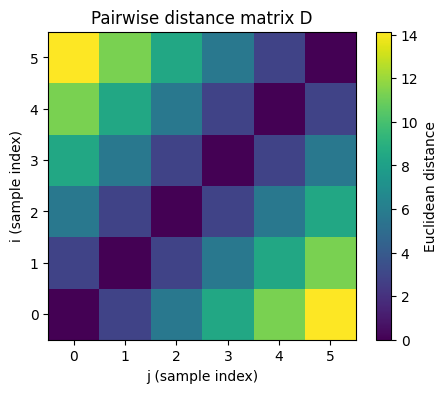

In [ ]:
plt.figure(figsize=(5, 4))
plt.imshow(D.numpy(), origin="lower", cmap="viridis")
plt.colorbar(label="Euclidean distance")
plt.title("Pairwise distance matrix D")
plt.xlabel("j (sample index)")
plt.ylabel("i (sample index)")
plt.show()


### 🧩 Exercise 0.3  
Extract the submatrix of rows `[1,4]` and columns `[0,2,3]` of  
`A = torch.arange(36).reshape(6, 6)`

**Expected Output:**
```
tensor([[ 6,  8,  9],
        [24, 26, 27]])
```


In [ ]:
A = torch.arange(36).reshape(6, 6)
# TODO: Extract submatrix using indexing
# rows = torch.tensor([...])
# cols = torch.tensor([...])
# subA = ...

#row and column indices
rows = torch.tensor([1, 4])
cols = torch.tensor([0, 2, 3])

subA = A[rows][:, cols]

print(subA)

tensor([[ 6,  8,  9],
        [24, 26, 27]])



### 🧩 Exercise 0.4  
Create a **boolean mask** `M` where `M[i,j]` is True iff `A[i,j]` is divisible by 5 or 7.


In [ ]:
A = torch.arange(36).reshape(6, 6)
print(A)
# TODO: Create boolean mask
# M = ...
# print(M.sum())

# divisible by 5
div5 = (A % 5 == 0)

# divisible by 7
div7 = (A % 7 == 0)

# True if divisible by 5 OR 7
M = div5 | div7   # (elementwise logical OR)

print(M)
print(M.sum())    # number of True entries


tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]])
tensor([[ True, False, False, False, False,  True],
        [False,  True, False, False,  True, False],
        [False, False,  True,  True, False, False],
        [False, False,  True,  True, False, False],
        [False,  True, False, False,  True, False],
        [ True, False, False, False, False,  True]])
tensor(12)



### 🧩 Exercise 0.5  
Using the mask `M`, add 10 to elements of `A` that are divisible by 5 or 7 (in-place).


In [ ]:
# TODO: Update A in-place
A[M] += 10
print(A)


tensor([[10,  1,  2,  3,  4, 15],
        [ 6, 17,  8,  9, 20, 11],
        [12, 13, 24, 25, 16, 17],
        [18, 19, 30, 31, 22, 23],
        [24, 35, 26, 27, 38, 29],
        [40, 31, 32, 33, 34, 45]])



## Distributions

`torch.distributions` provides a clean API for probability distributions and supports broadcasting.



### 🧩 Exercise 0.6  
Draw **100 samples** from a Poisson distribution with rate λ = 4.5.


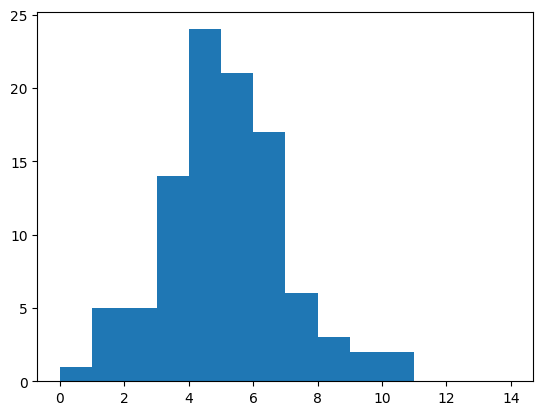

In [ ]:
# TODO: Draw samples and plot histogram

samples = dist.Poisson(4.5).sample((100,))
plt.hist(samples.numpy(), bins=range(0,15))
plt.show()


### 🧩 🧩 Exercise 0.7  
Construct a matrix `P` where  
`P[i,j] = exp(-λ[i]) * λ[i]^j / j!`  
for λ = `torch.arange(1.,6.)` and j = `torch.arange(5.)`.


In [ ]:
lam = torch.arange(1.,6.).view(-1,1)
j = torch.arange(5.).view(1,-1)
# TODO: Compute P using broadcasting and torch.lgamma
factorial = torch.exp(torch.lgamma(j+1))
# P = ...

P = torch.exp(-lam) * (lam ** j) / factorial

print(P)

tensor([[0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954],
        [0.0067, 0.0337, 0.0842, 0.1404, 0.1755]])


EXTENSION - Vary λ and j shapes to visualize broadcasting.

Case 1: λ shape torch.Size([9, 1]) j shape torch.Size([1, 5]) → P1 shape torch.Size([9, 5])
Case 2: λ shape torch.Size([5, 1]) j shape torch.Size([1, 15]) → P2 shape torch.Size([5, 15])
Case 3: λ shape torch.Size([9, 1]) j shape torch.Size([1, 15]) → P3 shape torch.Size([9, 15])




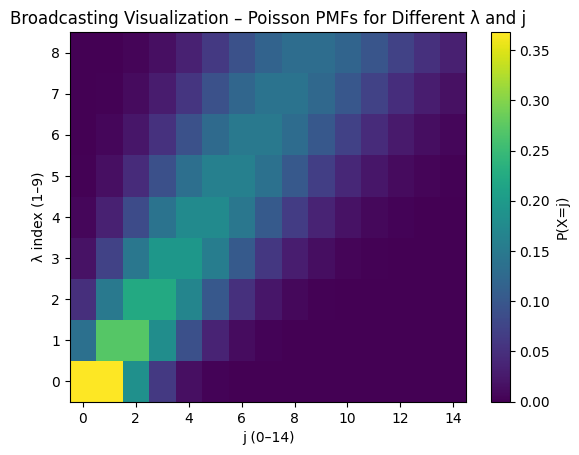

In [ ]:
# Broadcasting exploration

# Case 1: More λ values, same j
lam_big = torch.arange(1., 10.).view(-1, 1)   # (9,1)
P1 = torch.exp(-lam_big) * (lam_big ** j) / factorial
print("Case 1: λ shape", lam_big.shape, "j shape", j.shape, "→ P1 shape", P1.shape)

# Case 2: Same λ but more j values
j_big = torch.arange(0., 15.).view(1, -1)     # (1,15)
P2 = torch.exp(-lam) * (lam ** j_big) / torch.exp(torch.lgamma(j_big + 1))
print("Case 2: λ shape", lam.shape, "j shape", j_big.shape, "→ P2 shape", P2.shape)

# Case 3: Both λ and j larger
lam_large = torch.arange(1., 10.).view(-1, 1)   # (9,1)
j_large   = torch.arange(0., 15.).view(1, -1)   # (1,15)
P3 = torch.exp(-lam_large) * (lam_large ** j_large) / torch.exp(torch.lgamma(j_large + 1))
print("Case 3: λ shape", lam_large.shape, "j shape", j_large.shape, "→ P3 shape", P3.shape)

print("\n")

# Visualize one example
plt.imshow(P3.numpy(), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='P(X=j)')
plt.xlabel("j (0–14)")
plt.ylabel("λ index (1–9)")
plt.title("Broadcasting Visualization – Poisson PMFs for Different λ and j")
plt.show()


### 🧩 🧩 Exercise 0.8
Evaluate the **log-probability** of `[0.5, 2.0, 5.0]`  
under a Gamma distribution with shape=3.0, rate=2.0.


In [ ]:
# TODO: Evaluate log probability
g = dist.Gamma(concentration=3.0, rate=2.0)
logp = g.log_prob(torch.tensor([0.5, 2.0, 5.0]))
print(logp)

tensor([-1.0000, -1.2274, -5.3948])



### 🧩 Problem 0.9  
Draw **1000 samples** from a mixture of two Poisson distributions  
with rates 2 and 7, equal weights (0.5, 0.5).  
Plot a normalized histogram.


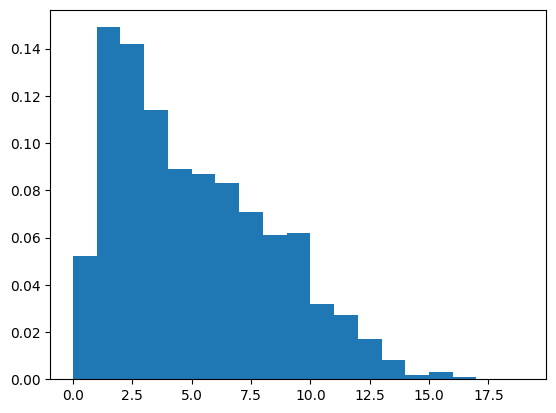

In [ ]:
# TODO: Draw samples from mixture
z = torch.bernoulli(torch.full((1000,), 0.5))
lam = torch.where(z.bool(), torch.tensor(7.), torch.tensor(2.))
samples = dist.Poisson(lam).sample()
plt.hist(samples.numpy(), bins=range(0,20), density=True)
plt.show()

EXTENSION - Compare the Poisson mixture histogram with theoretical PMFs.

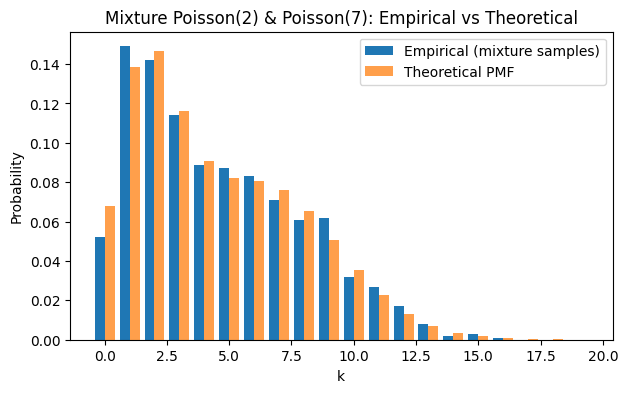

In [ ]:
# empirical histogram on k = 0..19
k_max = 20
k = torch.arange(0, k_max).float()

hist, _ = torch.histogram(samples.float(), bins=k_max, range=(0, k_max))
hist = hist / hist.sum()  # normalize

# theoretical mixture PMF on the same support
def pois_pmf(lmbda, kk):
    logp = -lmbda + kk * torch.log(lmbda) - torch.lgamma(kk + 1)
    return torch.exp(logp)

pmf2 = pois_pmf(torch.tensor(2.0), k)
pmf7 = pois_pmf(torch.tensor(7.0), k)
pmf_mix = 0.5 * pmf2 + 0.5 * pmf7

# small renorm since we truncate at 0..19
pmf_mix = pmf_mix / pmf_mix.sum()

# plot side-by-side bars
plt.figure(figsize=(7,4))
plt.bar((k-0.2).numpy(), hist.numpy(), width=0.4, label="Empirical (mixture samples)")
plt.bar((k+0.2).numpy(), pmf_mix.numpy(), width=0.4, alpha=0.75, label="Theoretical PMF")
plt.xlabel("k"); plt.ylabel("Probability")
plt.title("Mixture Poisson(2) & Poisson(7): Empirical vs Theoretical")
plt.legend()
plt.show()

EXTENSION - Explore dist.MixtureSameFamily for more complex mixtures.

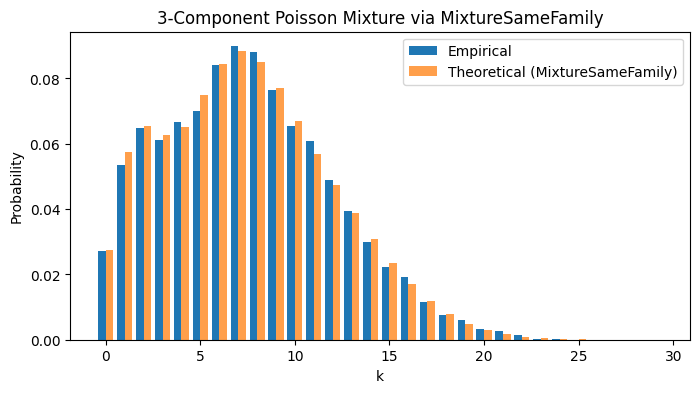

In [ ]:
# 3-component Poisson mixture: weights need not be equal
weights = torch.tensor([0.2, 0.5, 0.3])        # w1,w2,w3 sum to 1
rates   = torch.tensor([2.0, 7.0, 12.0])       # λ1, λ2, λ3

# Categorical over components + component distribution family
cat   = dist.Categorical(probs=weights)        # selects component index
pois  = dist.Poisson(rate=rates)               # family with 3 rates
mix   = dist.MixtureSameFamily(cat, pois)      # mixture distribution

# sample and compare to theoretical PMF
N = 10000
samples = mix.sample((N,))                     # shape (N,)

k_max = 30
k = torch.arange(0, k_max).float()
theory = torch.exp(mix.log_prob(k))            # mixture PMF at k

# empirical histogram on same support
hist = torch.histogram(samples.float(), bins=k_max, range=(0, k_max))[0]
hist = hist / hist.sum()

# plot
plt.figure(figsize=(8,4))
plt.bar((k-0.2).numpy(), hist.numpy(), width=0.4, label="Empirical")
plt.bar((k+0.2).numpy(), theory.numpy(), width=0.4, alpha=0.75, label="Theoretical (MixtureSameFamily)")
plt.xlabel("k")
plt.ylabel("Probability")
plt.title("3-Component Poisson Mixture via MixtureSameFamily")
plt.legend()
plt.show()


## Normal Distributions



### 🧩 Problem 0.10  
Use `dist.Normal` to draw a batch of shape `(200, 3)` of independent standard normal random variables.


In [ ]:
# TODO: Draw standard normal samples
normals = dist.Normal(0, 1).sample((200,3))
print(normals.shape)

torch.Size([200, 3])



### 🧩 Problem 0.11  
Use `dist.Normal` to draw a batch of shape `(4, 4)`  
with means given by `mu` and variance 1.0.


In [ ]:
mu = torch.tensor([[ 0,  1,  2,  3],
                   [ 4,  5,  6,  7],
                   [ 8,  9, 10, 11],
                   [12, 13, 14, 15]], dtype=torch.float32)
# TODO: Draw samples
samples = dist.Normal(mu, 1.0).sample()
print(samples)
print(samples.shape)


tensor([[-0.6459,  1.6305,  2.1323,  2.2528],
        [ 4.7429,  5.9046,  7.2592,  5.7281],
        [ 7.5843,  7.9360, 10.5175, 10.7330],
        [11.9656, 12.0692, 13.2174, 15.9066]])
torch.Size([4, 4])



---
### ✅ Notes / Extensions

- Vary λ and j shapes to visualize broadcasting.  
- Plot distance matrices `plt.imshow(D)` to see patterns.  
- Compare the Poisson mixture histogram with theoretical PMFs.  
- Explore `dist.MixtureSameFamily` for more complex mixtures.


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 1) Data: from arrays to `Dataset`/`DataLoader` + train/val/test split

**Key ideas**
- Always separate data into **train / validation / test** (e.g., 70/15/15).  
- Wrap arrays in a custom `Dataset` to keep the training loop clean.  
- Use a `DataLoader` for batching, shuffling, and parallel loading.

We'll start with toy 2D datasets for classification (moons and circles) and a simple 1D regression problem.


In [ ]:
#@title Toy datasets (classification: moons/circles) + (regression: y = ax + b + noise)
def make_toy_classification(n_samples=1000, kind="moons", noise=0.2, seed=0):
    set_seed(seed)
    if _HAS_SKLEARN:
        if kind == "moons":
            X, y = make_moons(n_samples=n_samples, noise=noise)
        elif kind == "circles":
            X, y = make_circles(n_samples=n_samples, factor=0.4, noise=noise)
        else:
            raise ValueError("kind must be 'moons' or 'circles'")
        X = X.astype(np.float32); y = y.astype(np.int64)
    else:
        # Torch-only fallback: two Gaussian blobs
        c1 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([0.0, 0.0])
        c2 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([2.5, 2.5])
        X = torch.cat([c1, c2], dim=0).numpy().astype(np.float32)
        y = torch.cat([torch.zeros(len(c1)), torch.ones(len(c2))]).numpy().astype(np.int64)
    return X, y

def make_toy_regression(n_samples=600, a=2.0, b=-1.0, noise_std=0.3, seed=0):
    set_seed(seed)
    x = np.random.uniform(-2.0, 2.0, size=(n_samples, 1)).astype(np.float32)
    y = (a * x + b + np.random.normal(0, noise_std, size=x.shape)).astype(np.float32)
    return x, y

class NumpyDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def train_val_test_split(ds: Dataset, ratios=(0.7, 0.15, 0.15), seed=42):
    assert abs(sum(ratios) - 1.0) < 1e-6, "Ratios must sum to 1"
    n = len(ds)
    n_train = int(ratios[0] * n)
    n_val = int(ratios[1] * n)
    n_test = n - n_train - n_val
    set_seed(seed)
    return random_split(ds, [n_train, n_val, n_test])


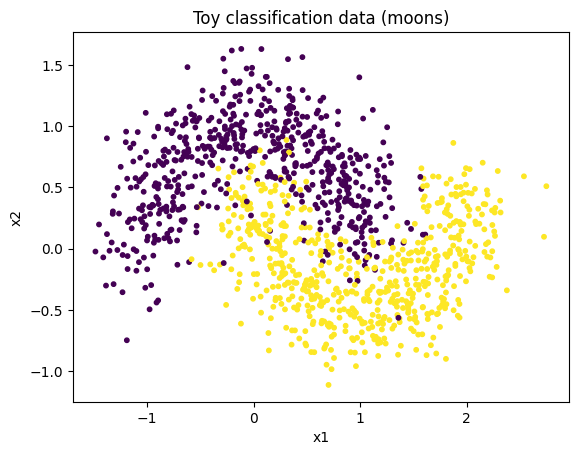

(840, 180, 180)

In [ ]:

#@title Visualize a toy classification dataset
Xc, yc = make_toy_classification(n_samples=1200, kind="moons", noise=0.25, seed=1)
ds_cls = NumpyDataset(Xc, yc)
train_ds, val_ds, test_ds = train_val_test_split(ds_cls, (0.7, 0.15, 0.15), seed=1)

plt.figure()
plt.scatter(Xc[:,0], Xc[:,1], c=yc, s=10)
plt.title("Toy classification data (moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

len(train_ds), len(val_ds), len(test_ds)


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

## 2) Linear Regression in PyTorch (MSE loss)

We'll fit a line to noisy data: \( y \approx ax + b \).  
This section introduces:
- `nn.Module` for models
- Mean Squared Error (MSE) loss
- `optim.SGD` and `optim.Adam`


In [ ]:
#@title Linear regression dataset & model
Xr, yr = make_toy_regression(n_samples=600, a=2.2, b=-0.7, noise_std=0.35, seed=2)
ds_reg = NumpyDataset(Xr, yr)

train_r, val_r, test_r = train_val_test_split(ds_reg, (0.7, 0.15, 0.15), seed=2)
train_loader_r = DataLoader(train_r, batch_size=64, shuffle=True)
val_loader_r   = DataLoader(val_r, batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_r, batch_size=128, shuffle=False)

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0.0)  # weight_decay = L2


In [ ]:
#@title Training & evaluation utilities
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        preds = model(xb)
        loss = criterion(preds, yb)
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)


Epoch 050 | train: 0.1175 | val: 0.0840
Epoch 100 | train: 0.1170 | val: 0.0847
Epoch 150 | train: 0.1170 | val: 0.0847
Epoch 200 | train: 0.1170 | val: 0.0848


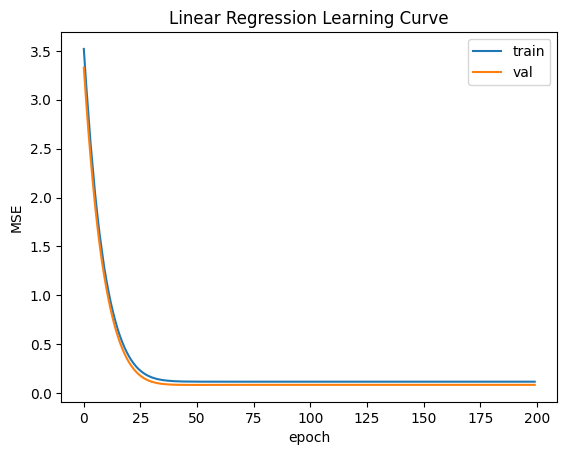

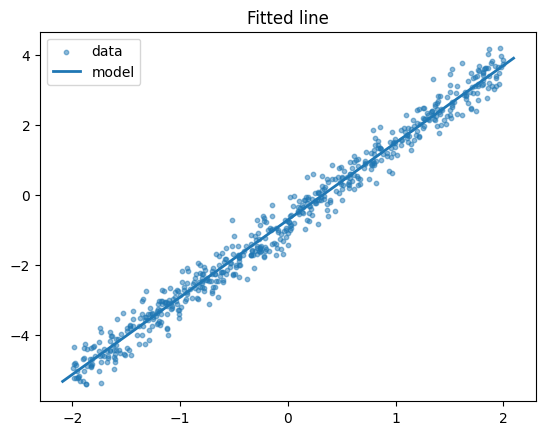

In [ ]:
#@title Fit linear model & plot learning curve
train_hist, val_hist = [], []
epochs = 200
best_val = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    train_hist.append(tr); val_hist.append(va)
    if va < best_val:
        best_val = va; best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

# restore best
model.load_state_dict(best_state)

plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Linear Regression Learning Curve")
plt.legend(); plt.show()

# Visualize fit
@torch.no_grad()
def predict(x):
    return model(torch.from_numpy(x).to(DEVICE)).cpu().numpy()

xs = np.linspace(Xr.min()-0.1, Xr.max()+0.1, 200).reshape(-1,1).astype(np.float32)
ys = predict(xs)

plt.figure()
plt.scatter(Xr, yr, s=10, alpha=0.5, label="data")
plt.plot(xs, ys, linewidth=2, label="model")
plt.legend(); plt.title("Fitted line"); plt.show()


# Exercise A
Create a synthetic data where the regressor x is an (n,2) dimensional tensor
and the target y is a (n,4) dimensional tensor. Does the LinearRegressor model
``` python
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
```
work? Why or why not? How can you modify the class to make it work? Once you fit the model, visualize the result.

# SOLUTION

**No.** This data has shape x: (n,2) and y: (n,4), so the linear map must be 2 inputs → 4 outputs.

nn.Linear(1,1) expects a single feature and produces one target; it will fail on shape (n,2) and can't produce 4 targets.

**FIX** - Use nn.Linear(2, 4)

In [ ]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 4)  # 2 features -> 4 targets
    def forward(self, x):
        return self.linear(x)

Epoch 050 | train: 0.0129 | val: 0.0117
Epoch 100 | train: 0.0100 | val: 0.0096
Epoch 150 | train: 0.0100 | val: 0.0096
Epoch 200 | train: 0.0101 | val: 0.0096

True W:
 tensor([[ 2.0000, -1.0000],
        [ 0.5000,  1.5000],
        [-1.2000,  0.7000],
        [ 3.0000,  0.3000]])
Learned W:
 tensor([[ 2.0031, -0.9978],
        [ 0.4988,  1.4998],
        [-1.2038,  0.7015],
        [ 3.0015,  0.3048]])

True b:
 tensor([ 0.3000, -0.7000,  1.2000,  2.0000])
Learned b:
 tensor([ 0.2998, -0.7016,  1.1953,  1.9982])


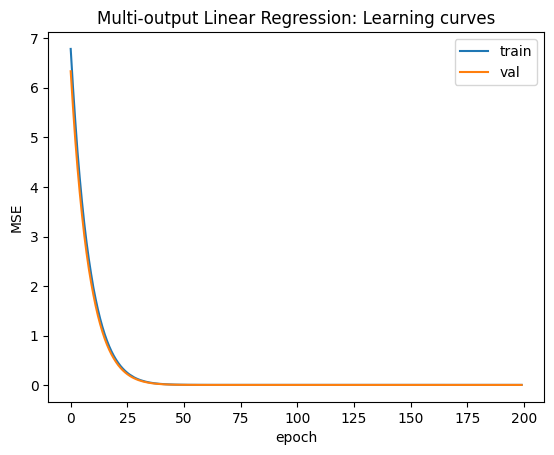

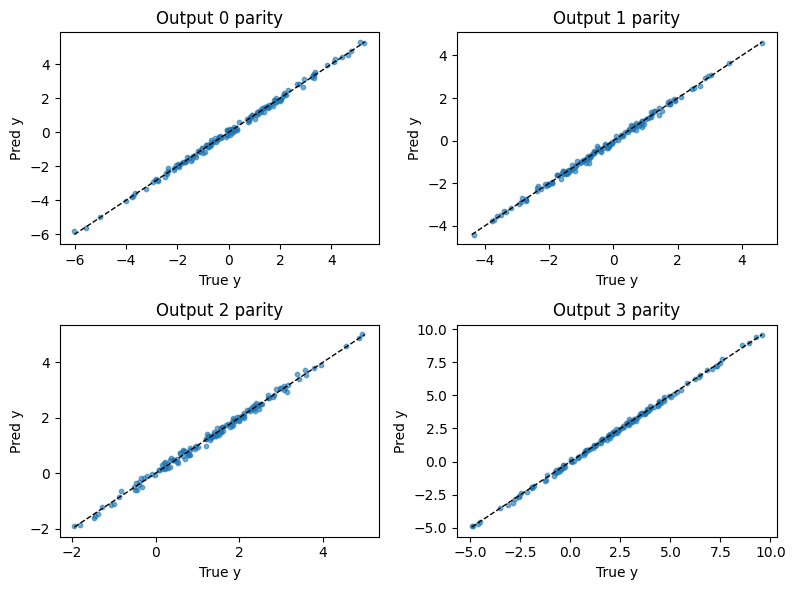

In [ ]:
# 1) Make synthetic (n,2) -> (n,4) linear data
n = 1000

# true parameters: y = X * W^T + b + noise
W_true = torch.tensor([[ 2.0, -1.0],
                       [ 0.5,  1.5],
                       [-1.2,  0.7],
                       [ 3.0,  0.3]], dtype=torch.float32)  # shape (4,2)
b_true = torch.tensor([0.3, -0.7, 1.2, 2.0], dtype=torch.float32)          # shape (4,)

X = torch.randn(n, 2, dtype=torch.float32)                       # (n,2)
noise = 0.1 * torch.randn(n, 4, dtype=torch.float32)             # small Gaussian noise
Y = X @ W_true.T + b_true + noise                                # (n,4)

# wrap in your existing dataset/split utilities
ds = NumpyDataset(X.numpy(), Y.numpy())
train_ds, val_ds, test_ds = train_val_test_split(ds, (0.7, 0.15, 0.15), seed=3)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=128, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=128, shuffle=False)

# 2) Model, loss, optimizer
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 4)  # fix: 2 inputs, 4 outputs
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# 3) Train with your helpers
train_hist, val_hist = [], []
epochs = 200
best_val, best_state = float("inf"), None

for ep in range(1, epochs+1):
    tr = train_epoch(model, train_loader, criterion, optimizer)
    va = evaluate(model, val_loader, criterion)
    train_hist.append(tr); val_hist.append(va)
    if va < best_val:
        best_val, best_state = va, {k:v.cpu().clone() for k,v in model.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d} | train: {tr:.4f} | val: {va:.4f}")

model.load_state_dict(best_state)

# 4) Inspect learned parameters vs ground truth
W_learn = model.linear.weight.detach().cpu()   # shape (4,2)
b_learn = model.linear.bias.detach().cpu()     # shape (4,)
print("\nTrue W:\n", W_true)
print("Learned W:\n", W_learn)
print("\nTrue b:\n", b_true)
print("Learned b:\n", b_learn)

# 5) Visualize results
# (a) Learning curves
import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Multi-output Linear Regression: Learning curves")
plt.legend(); plt.show()

# (b) Parity plots: y_pred vs y_true for each of the 4 outputs
@torch.no_grad()
def predict_tensor(x_t):
    return model(x_t.to(DEVICE)).cpu()

X_test, Y_test = next(iter(DataLoader(test_ds, batch_size=len(test_ds), shuffle=False)))
Y_hat = predict_tensor(X_test)

fig, axes = plt.subplots(2, 2, figsize=(8,6))
axes = axes.ravel()
for k in range(4):
    axes[k].scatter(Y_test[:,k].numpy(), Y_hat[:,k].numpy(), s=10, alpha=0.6)
    mn = float(min(Y_test[:,k].min(), Y_hat[:,k].min()))
    mx = float(max(Y_test[:,k].max(), Y_hat[:,k].max()))
    axes[k].plot([mn, mx], [mn, mx], 'k--', linewidth=1)  # ideal y=x line
    axes[k].set_title(f"Output {k} parity")
    axes[k].set_xlabel("True y"); axes[k].set_ylabel("Pred y")
plt.tight_layout(); plt.show()


#Exercise B
The function train_val_test_split does the job, but it does not seem very elegant. Using  
``` python
    from torch.utils.data import random_split
```    
create a 60-20-20 split of your data and train a model using that.

# SOLUTION

In [ ]:
# 1) 60/20/20 split with random_split (reproducible)
n = len(ds_reg)
n_train = int(0.6 * n)
n_val   = int(0.2 * n)
n_test  = n - n_train - n_val
g = torch.Generator().manual_seed(123)

train_r, val_r, test_r = random_split(ds_reg, [n_train, n_val, n_test], generator=g)
print(len(train_r), len(val_r), len(test_r))  # sanity check: sums to n

# 2) DataLoaders
train_loader_r = DataLoader(train_r, batch_size=64, shuffle=True)
val_loader_r   = DataLoader(val_r, batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_r, batch_size=128, shuffle=False)

# 3) Model / loss / optimizer
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)   # 1D x -> 1D y
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# 4) Train with your existing helpers
train_hist, val_hist = [], []
best_val, best_state = float("inf"), None
epochs = 200

for ep in range(1, epochs+1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    train_hist.append(tr); val_hist.append(va)
    if va < best_val:
        best_val, best_state = va, {k: v.cpu().clone() for k, v in model.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d} | train: {tr:.4f} | val: {va:.4f}")

model.load_state_dict(best_state)


360 120 120
Epoch 050 | train: 1.0449 | val: 0.9289
Epoch 100 | train: 0.1288 | val: 0.1190
Epoch 150 | train: 0.1152 | val: 0.1075
Epoch 200 | train: 0.1151 | val: 0.1076


<All keys matched successfully>

## Exercise C
### Write your own Mean Squared Error

PyTorch provides a built-in criterion:

```python
criterion = nn.MSELoss()
```

But it’s important to understand what happens under the hood.
Let’s implement our own version — call it nn.MeanSquaredOops — that behaves like nn.MSELoss. It should work as a callable class:

```python
criterion = MeanSquaredOops()
loss = criterion(y_pred, y_true)
```

```python
# YOUR WORK: Implement MeanSquaredOops to mimic nn.MSELoss
import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):
        # compute the mean of squared differences
        raise NotImplementedError("Implement the MSE formula here!")

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("Your MeanSquaredOops:", oops(y_pred, y_true).item())

```

Write a function to visualize the loss function curves on: training, testing and evaluation datasets. How do they look like?

# SOLUTION

In [ ]:
# Implement MeanSquaredOops to mimic nn.MSELoss
import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):
        # compute the mean of squared differences
        diff = y_pred - y_true
        return (diff ** 2).mean()

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("My MeanSquaredOops:", oops(y_pred, y_true).item())


PyTorch MSELoss: 0.17000000178813934
My MeanSquaredOops: 0.17000000178813934


Epoch 050 | train: 0.1359 | val: 0.1198 | test: 0.1376
Epoch 100 | train: 0.1178 | val: 0.1096 | test: 0.1151
Epoch 150 | train: 0.1178 | val: 0.1096 | test: 0.1150
Epoch 200 | train: 0.1178 | val: 0.1095 | test: 0.1150


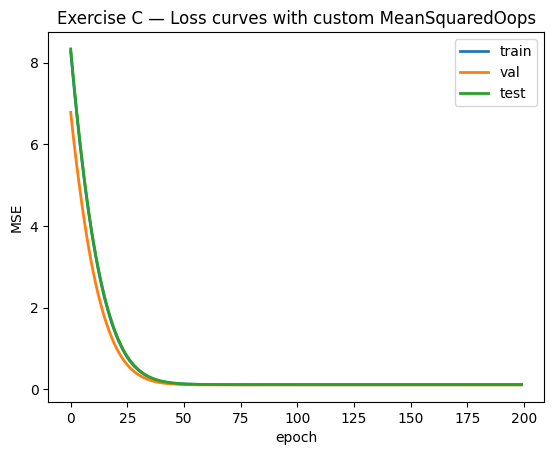

In [ ]:
import torch
import torch.nn as nn
import numpy as np # Ensure numpy is imported
from torch.utils.data import Dataset, DataLoader, random_split # Ensure these are imported for this cell
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting

# Tiny synthetic regression problem: y = a*x + b + noise
n = 600
a_true, b_true, noise_std = 2.2, -0.7, 0.35
X = torch.empty(n, 1).uniform_(-2.0, 2.0)
Y = a_true * X + b_true + noise_std * torch.randn_like(X)

class NumpyDataset(Dataset):
    def __init__(self, X, y):
        # Use torch.as_tensor to handle both np.ndarray and torch.Tensor inputs
        self.X = torch.as_tensor(X, dtype=torch.float32)
        # For regression targets, float32 is appropriate
        self.y = torch.as_tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

ds = NumpyDataset(X, Y)

# 70/15/15 split (use random_split per Exercise B style)
n_train = int(0.7 * n)
n_val   = int(0.15 * n)
n_test  = n - n_train - n_val
train_ds, val_ds, test_ds = random_split(ds, [n_train, n_val, n_test], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=128, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=128, shuffle=False)


# Linear model, train/eval helpers

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 1D -> 1D
    def forward(self, x): return self.linear(x)

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total, count = 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        preds = model(xb)
        loss = criterion(preds, yb)
        total += loss.item() * xb.size(0)
        count += xb.size(0)
    return total / count

def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total, count = 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total += loss.item() * xb.size(0)
        count += xb.size(0)
    return total / count


# Train with custom loss + record train/val/test curves
model = LinearRegressor().to(DEVICE)
criterion = MeanSquaredOops()  # use our custom MSE
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

epochs = 200
train_hist, val_hist, test_hist = [], [], []
best_val, best_state = float("inf"), None

for ep in range(1, epochs+1):
    tr = train_epoch(model, train_loader, criterion, optimizer)
    va = evaluate(model, val_loader,   criterion)
    te = evaluate(model, test_loader,  criterion)
    train_hist.append(tr); val_hist.append(va); test_hist.append(te)
    if va < best_val:
        best_val = va
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d} | train: {tr:.4f} | val: {va:.4f} | test: {te:.4f}")

# restore best-by-val
model.load_state_dict(best_state)


# Visualize loss curves
plt.figure()
plt.plot(train_hist, label="train", linewidth=2)
plt.plot(val_hist,   label="val",   linewidth=2)
plt.plot(test_hist,  label="test",  linewidth=2)
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Exercise C — Loss curves with custom MeanSquaredOops")
plt.legend(); plt.show()


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 3) Classification with an MLP (Cross-Entropy loss)

- Two-layer MLP with ReLU and Dropout  
- Cross-entropy loss for a 2-class problem  
- Accuracy metric  
- Optional L2 (weight decay) for regularization  
- Optional learning-rate scheduler


In [ ]:
#@title Dataloaders for classification
batch_size = 64
train_loader_c = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader_c   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader_c  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

In [ ]:
#@title MLP model, loss, optimizer, scheduler
class MLP(nn.Module):
    def __init__(self, in_dim=2, hidden=64, p_dropout=0.2, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(p_dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, n_classes)
        )
    def forward(self, x):
        return self.net(x)

mlp = MLP().to(DEVICE)
ce = nn.CrossEntropyLoss()
opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)  # weight_decay = L2 regularization
sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)

## Exercise D
Write using markdown + LaTex what the MLP above is implementing. Explain what ReLU, Dropout, Linear are. Write down what the dimension of an object x.forward is before the nn.Dropout(p_dropout) operation.


In [ ]:
#@title Train loop with accuracy
def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

def train_epoch_cls(model, loader, criterion, optimizer):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n

@torch.no_grad()
def evaluate_cls(model, loader, criterion):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        loss = criterion(logits, yb)
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n


# MLP for Binary Classification (ReLU + Dropout)


**Architecture (inputs 2D → logits for 2 classes):**

$$
\begin{aligned}
\mathbf{x} &\in \mathbb{R}^{2},\\
\mathbf{h}_1 &= \mathrm{ReLU}\!\big(\mathbf{x} W_1^\top + \mathbf{b}_1\big)\in \mathbb{R}^{64},\\
\tilde{\mathbf{h}}_1 &= \mathrm{Dropout}_p(\mathbf{h}_1)\in \mathbb{R}^{64},\\
\mathbf{h}_2 &= \mathrm{ReLU}\!\big(\tilde{\mathbf{h}}_1 W_2^\top + \mathbf{b}_2\big)\in \mathbb{R}^{64},\\
\mathbf{z} &= \mathbf{h}_2 W_3^\top + \mathbf{b}_3 \in \mathbb{R}^{2}.
\end{aligned}
$$

with $(W_1\in\mathbb{R}^{64\times 2}), (W_2\in\mathbb{R}^{64\times 64}), (W_3\in\mathbb{R}^{2\times 64})$.  `nn.CrossEntropyLoss` takes logits $(\mathbf{z})$ directly (it applies log-softmax internally).

---

**Layers (what they do):**
- **Linear:** $(\mathbf{y}=\mathbf{x}W^\top+\mathbf{b})$ (affine map; for batch \(B\), output shape $(B\times d_{\text{out}})$).

- **ReLU:** $( \mathrm{ReLU}(a)=\max(0,a) $) (element-wise nonlinearity).

- **Dropout (p):** zeros each unit with prob. \(p\) during training and rescales by $(1/(1-p)$); identity at eval.

---

**Loss (2-class cross-entropy):**
$$
L_{\mathrm{CE}}(\mathbf{z},y)
= -\log\frac{e^{z_y}}{\sum_{c=0}^{1} e^{z_c}}
= -z_y + \log\!\sum_{c=0}^{1} e^{z_c},\quad y\in\{0,1\}.
$$

---

**Accuracy:**
$$
\mathrm{acc}=\frac{1}{B}\sum_{i=1}^{B}\mathbf{1}\!\left\{\arg\max_{c} z_{i,c}=y_i\right\}.
$$

---

**Shape right before `nn.Dropout(p_dropout)`:**  
For a batch $(X\in\mathbb{R}^{B\times 2}$),
$$
H_1 = X W_1^\top + \mathbf{b}_1 \in \mathbb{R}^{B\times 64},
$$
and ReLU preserves shape, so **just before Dropout** the tensor is $\boxed{B\times 64}\$.


## Exercise E
Write the code above in as few lines of code as possible. What torch functions can you use?

# SOLUTION

In [ ]:
class ClsDS(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.as_tensor(X, dtype=torch.float32)  # (N,2)
        self.y = torch.as_tensor(y, dtype=torch.long)     # (N,)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

ds_cls = ClsDS(Xc, yc)
g = torch.Generator().manual_seed(1)
n = len(ds_cls); n_tr = int(0.7*n); n_va = int(0.15*n); n_te = n - n_tr - n_va
train_ds_c, val_ds_c, test_ds_c = torch.utils.data.random_split(ds_cls, [n_tr, n_va, n_te], generator=g)

train_loader_c = DataLoader(train_ds_c, batch_size=64, shuffle=True)
val_loader_c   = DataLoader(val_ds_c,   batch_size=128, shuffle=False)
test_loader_c  = DataLoader(test_ds_c,  batch_size=128, shuffle=False)

xb, yb = next(iter(train_loader_c))
assert xb.shape[1] == 2, f"Expected 2 features, got {xb.shape}"
assert yb.dtype == torch.long, f"CE loss needs long labels, got {yb.dtype}"

mlp = MLP(in_dim=2, hidden=64, p_dropout=0.2, n_classes=2).to(DEVICE)
ce   = nn.CrossEntropyLoss()
opt  = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)
sched= torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)

Epoch 050  loss: 0.148/0.112  acc: 0.942/0.950
Epoch 100  loss: 0.146/0.121  acc: 0.946/0.944
Epoch 150  loss: 0.136/0.112  acc: 0.946/0.939
Epoch 200  loss: 0.137/0.113  acc: 0.950/0.944
Epoch 250  loss: 0.122/0.112  acc: 0.954/0.939
Epoch 300  loss: 0.125/0.112  acc: 0.951/0.939


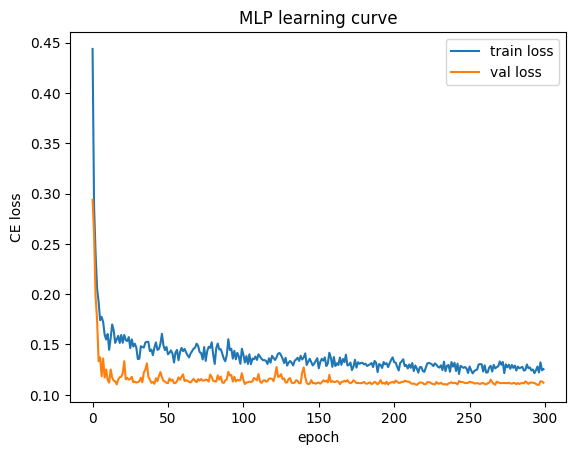

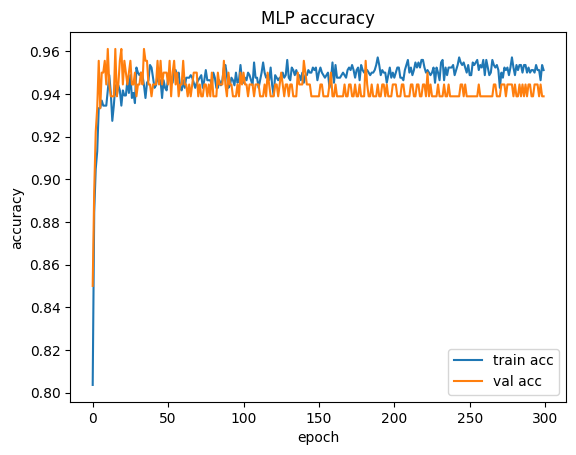

In [ ]:
#@title Fit MLP
best_val = 1e9; best_state = None
hist = {"tr_loss":[], "tr_acc":[], "va_loss":[], "va_acc":[]}
epochs = 300

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(mlp, train_loader_c, ce, opt)
    va_loss, va_acc = evaluate_cls(mlp, val_loader_c, ce)
    hist["tr_loss"].append(tr_loss); hist["tr_acc"].append(tr_acc)
    hist["va_loss"].append(va_loss); hist["va_acc"].append(va_acc)
    sched.step()
    if va_loss < best_val:
        best_val = va_loss
        best_state = {k: v.cpu().clone() for k, v in mlp.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d}  loss: {tr_loss:.3f}/{va_loss:.3f}  acc: {tr_acc:.3f}/{va_acc:.3f}")

mlp.load_state_dict(best_state)

plt.figure()
plt.plot(hist["tr_loss"], label="train loss")
plt.plot(hist["va_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("CE loss"); plt.legend(); plt.title("MLP learning curve"); plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train acc")
plt.plot(hist["va_acc"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("MLP accuracy"); plt.show()

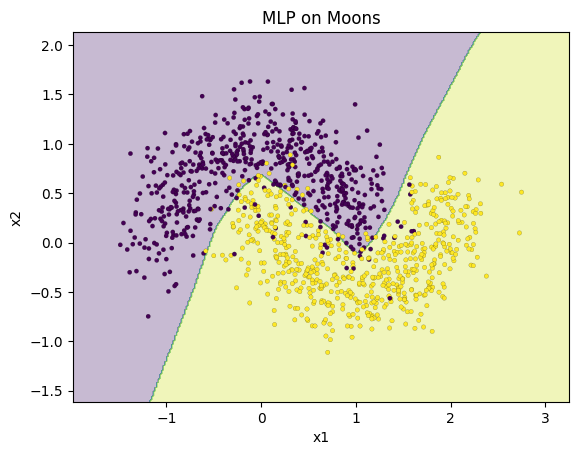

In [ ]:
#@title Decision boundary visualization
@torch.no_grad()
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)
    logits = model(torch.from_numpy(grid).to(DEVICE)).cpu().numpy()
    Z = logits.argmax(axis=1).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=10, edgecolor="k", linewidth=0.1)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

Xc_np, yc_np = Xc, yc
plot_decision_boundary(mlp, Xc_np, yc_np, title="MLP on Moons")

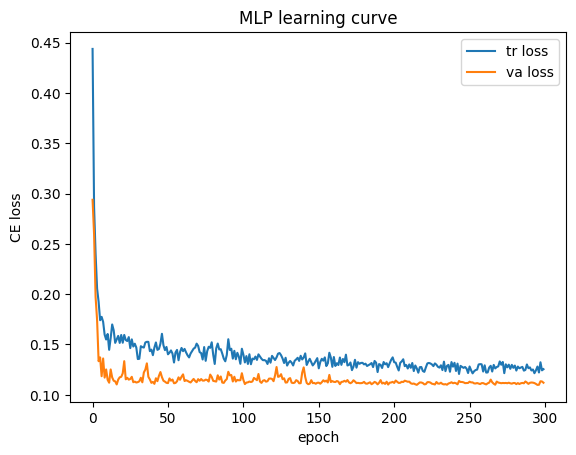

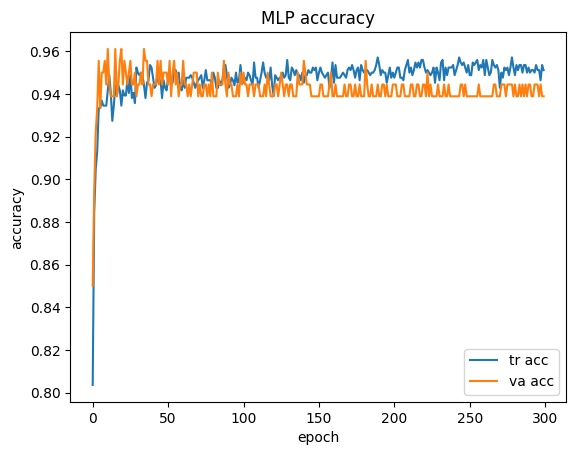

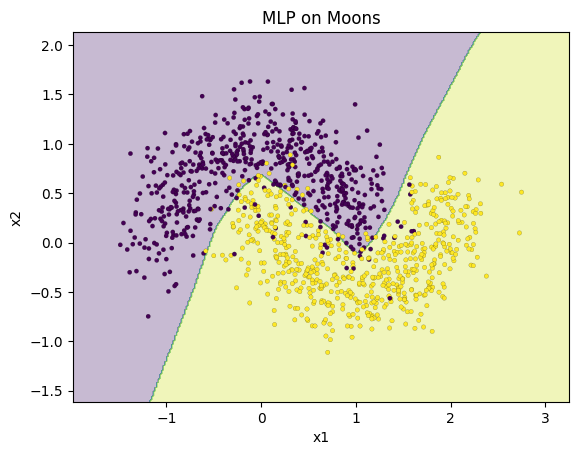

In [ ]:
# Compact

# Curves
for keys, yl, tt in [(("tr_loss","va_loss"), "CE loss", "MLP learning curve"),
                     (("tr_acc","va_acc"),   "accuracy","MLP accuracy")]:
    plt.figure(); [plt.plot(hist[k], label=k.replace("_"," ")) for k in keys]
    plt.xlabel("epoch"); plt.ylabel(yl); plt.legend(); plt.title(tt); plt.show()

# Decision boundary
@torch.no_grad()
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    was_tr = model.training; model.eval()
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.stack([xx.ravel(), yy.ravel()], 1).astype(np.float32)
    Z = mlp(torch.from_numpy(grid).to(DEVICE)).argmax(1).cpu().numpy().reshape(xx.shape)
    plt.figure(); plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=10, edgecolor="k", linewidth=0.1)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2"); plt.show()
    if was_tr: model.train()

plot_decision_boundary(mlp, Xc, yc, "MLP on Moons")


Torch functions that make it short & clean

`DataLoader(..., shuffle=True)` for batching/shuffling.

`nn.Sequential, nn.Linear, nn.ReLU, nn.Dropout` to define the MLP succinctly.

`nn.CrossEntropyLoss` to consume logits directly.

`torch.optim.Adam` + `StepLR` for optimization & LR scheduling.

`argmax(dim=1)` to convert logits → class labels.

`state_dict()` / `load_state_dict()` to keep the best model.

`torch.no_grad()` + `model.eval()` for deterministic plotting.

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 4) (Optional) Tiny CNN on synthetic images

We'll create small 16×16 grayscale images containing either a **dot** or a **ring** and train a mini-CNN.
This mirrors the idea of "coloring pixels" or simple shape detection and is fast to run on CPU.


In [ ]:

#@title Synthetic image dataset (dot vs ring)
def make_dot(center, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    img[center] = 1.0
    return img

def make_ring(center, radius=3, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    cx, cy = center
    for x in range(size):
        for y in range(size):
            if abs(math.hypot(x-cx, y-cy) - radius) < 0.6:
                img[x, y] = 1.0
    return img

def make_image_dataset(n=2000, size=16, seed=0):
    set_seed(seed)
    X, y = [], []
    for i in range(n):
        cls = np.random.randint(0,2)  # 0=dot, 1=ring
        cx, cy = np.random.randint(4, size-4), np.random.randint(4, size-4)
        if cls == 0:
            img = make_dot((cx, cy), size)
        else:
            img = make_ring((cx, cy), radius=np.random.randint(2,4), size=size)
        # jitter + blur-like noise
        img += 0.05 * np.random.randn(size, size).astype(np.float32)
        img = np.clip(img, 0.0, 1.0)
        X.append(img[None, ...])  # channels=1
        y.append(cls)
    X = np.stack(X).astype(np.float32)
    y = np.array(y, dtype=np.int64)
    return X, y

class ImageDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

Xi, yi = make_image_dataset(n=2500, size=16, seed=0)
ds_img = ImageDataset(Xi, yi)
tr_i, va_i, te_i = train_val_test_split(ds_img, (0.7, 0.15, 0.15), seed=3)
tr_li = DataLoader(tr_i, batch_size=128, shuffle=True)
va_li = DataLoader(va_i, batch_size=256, shuffle=False)
te_li = DataLoader(te_i, batch_size=256, shuffle=False)


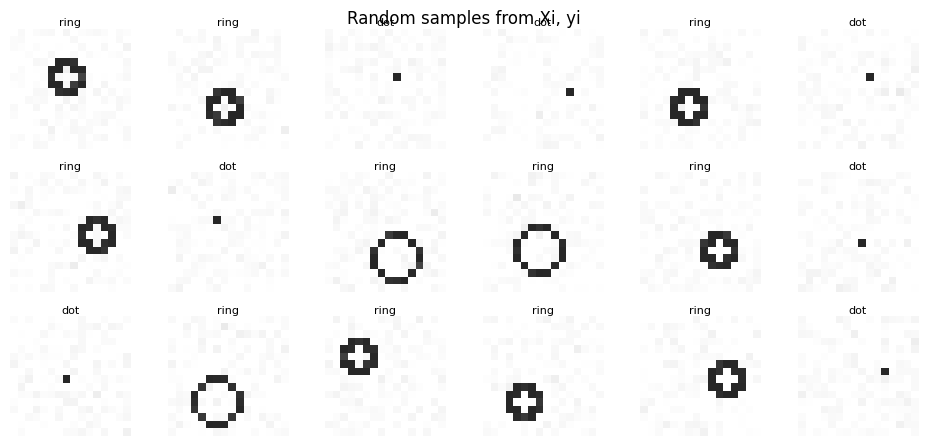

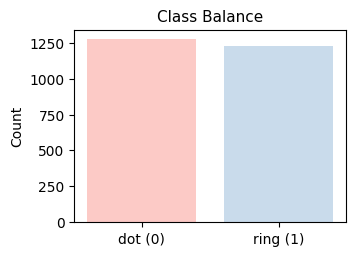

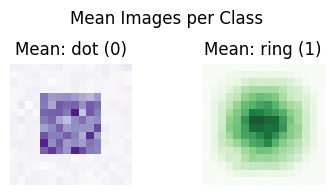

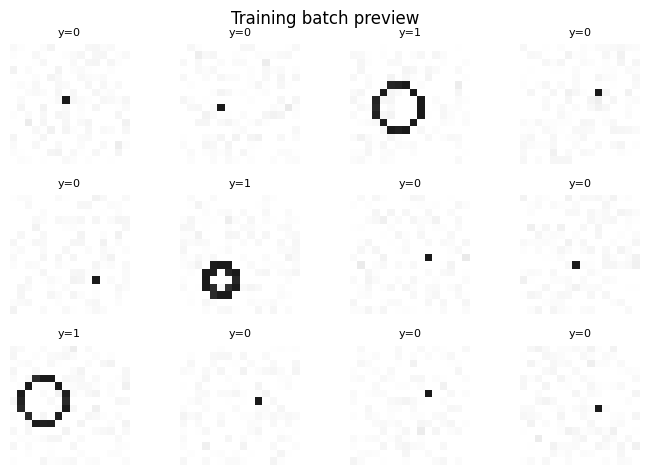

In [ ]:
#@title Visualize the Synthetic image dataset (dot vs ring)
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: pastel color palette ---
PASTEL = plt.cm.Pastel1(np.linspace(0, 1, 8))
dot_color, ring_color = PASTEL[0], PASTEL[1]

def visualize_dataset(Xi, yi, nrows=3, ncols=6, size=16):
    idx = np.random.choice(len(Xi), nrows * ncols, replace=False)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*1.6, nrows*1.6))
    axes = axes.ravel()
    for ax, i in zip(axes, idx):
        ax.imshow(Xi[i,0], cmap="Greys", alpha=0.85)
        c = dot_color if yi[i] == 0 else ring_color
        ax.set_facecolor(c)
        ax.set_title("dot" if yi[i]==0 else "ring", fontsize=8, pad=2)
        ax.axis("off")
    fig.suptitle("Random samples from Xi, yi", fontsize=12, y=0.92)
    plt.tight_layout()
    plt.show()

def visualize_class_means(Xi, yi):
    mean_dot = Xi[yi==0].mean(axis=0)[0]
    mean_ring = Xi[yi==1].mean(axis=0)[0]
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].imshow(mean_dot, cmap="Purples", alpha=0.9)
    axes[0].set_title("Mean: dot (0)")
    axes[1].imshow(mean_ring, cmap="Greens", alpha=0.9)
    axes[1].set_title("Mean: ring (1)")
    for ax in axes: ax.axis("off")
    plt.suptitle("Mean Images per Class", y=0.95)
    plt.tight_layout()
    plt.show()

def visualize_class_balance(yi):
    counts = np.bincount(yi)
    plt.figure(figsize=(3.5, 2.5))
    plt.bar(["dot (0)", "ring (1)"], counts, color=[dot_color, ring_color], alpha=0.7)
    plt.ylabel("Count")
    plt.title("Class Balance", fontsize=11)
    plt.show()

# --- Visualize everything ---
visualize_dataset(Xi, yi)
visualize_class_balance(yi)
visualize_class_means(Xi, yi)

# Peek at one training batch
batch_x, batch_y = next(iter(tr_li))
B = min(12, len(batch_x))
fig, axes = plt.subplots(3, 4, figsize=(7, 5))
axes = axes.ravel()
for i in range(B):
    ax = axes[i]
    ax.imshow(batch_x[i,0], cmap="Greys", alpha=0.9)
    c = dot_color if batch_y[i]==0 else ring_color
    ax.set_facecolor(c)
    ax.set_title(f"y={batch_y[i].item()}", fontsize=8)
    ax.axis("off")
for i in range(B, len(axes)): axes[i].axis("off")
plt.suptitle("Training batch preview", fontsize=12, y=0.94)
plt.tight_layout()
plt.show()


In [ ]:

#@title Tiny CNN + training
class TinyCNN(nn.Module):
    def __init__(self, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16*4*4, 32), nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, n_classes)
        )
    def forward(self, x): return self.net(x)

cnn = TinyCNN().to(DEVICE)
opt_cnn = torch.optim.Adam(cnn.parameters(), lr=1e-3, weight_decay=1e-4)
ce = nn.CrossEntropyLoss()

epochs = 20
for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)
    if ep % 5 == 0:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test acc: {test_acc:.3f}")


[CNN] Epoch 05  loss 0.011/0.003  acc 1.000/1.000
[CNN] Epoch 10  loss 0.001/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test acc: 1.000


[CNN] Epoch 01  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 05  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 10  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test loss/acc: 0.000 / 1.000


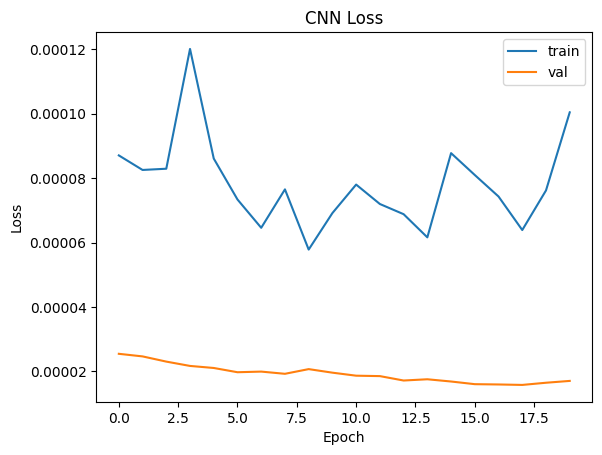

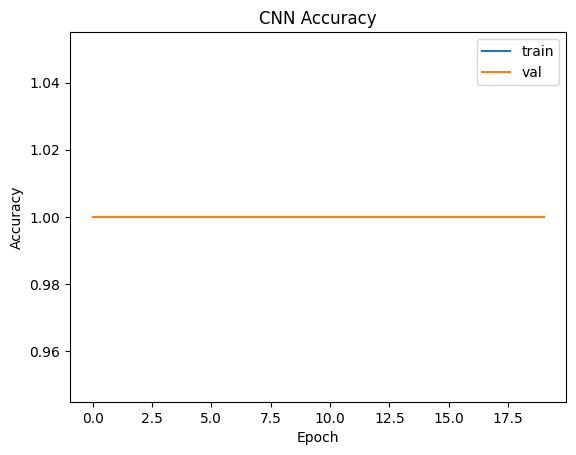

In [ ]:
#@title Logging history and visualizing training:
epochs = 20
hist = {"tr_loss": [], "va_loss": [], "tr_acc": [], "va_acc": []}

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)   # returns (loss, accuracy)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)               # returns (loss, accuracy)

    hist["tr_loss"].append(tr_loss); hist["va_loss"].append(va_loss)
    hist["tr_acc"].append(tr_acc);   hist["va_acc"].append(va_acc)

    if ep % 5 == 0 or ep == 1 or ep == epochs:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test loss/acc: {test_loss:.3f} / {test_acc:.3f}")

# ---- Curves ----
plt.figure()
plt.plot(hist["tr_loss"], label="train")
plt.plot(hist["va_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train")
plt.plot(hist["va_acc"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Accuracy")
plt.legend()
plt.show()

## Exercise F: Too good to be true!
There is something amiss with this accuracy. It seems the model is great from the beggining? What could be the case? Is there a bug in the code? Is the architecture to complex for a dataset that is too simple? Describe through words and code how you reach your conclusion. Ask yourself: Is there overlap in training vs testing? Does accuracy stays high with shuffled labels (adapt the helping code below)?


```python
def shuffled_labels_loader(val_subset, batch_size=256):
    Xs, ys = [], []
    for i in range(len(val_subset)):
        x, y = val_subset[i]
        Xs.append(x.unsqueeze(0))
        ys.append(torch.tensor([y]))
    Xs = torch.cat(Xs, dim=0)
    ys = torch.cat(ys, dim=0)

    perm = torch.randperm(len(ys))
    ys_shuf = ys[perm]

    class _MemDataset(torch.utils.data.Dataset):
        def __init__(self, Xs, ys): self.Xs, self.ys = Xs, ys
        def __len__(self): return len(self.ys)
        def __getitem__(self, i): return self.Xs[i], self.ys[i]

    ds = _MemDataset(Xs, ys_shuf)
    return torch.utils.data.DataLoader(ds, batch_size=batch_size, shuffle=False)

va_li_shuf = shuffled_labels_loader(va_i)
criterion = nn.CrossEntropyLoss()
_ = cnn.eval()
with torch.no_grad():
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, criterion, device=DEVICE)
print("Sanity (shuffled labels) acc should be ~chance:", acc_shuf)


Overlap train∩val: 0
Overlap train∩test: 0
Overlap val∩test: 0
Sanity (shuffled labels) — acc should be ~0.5: 0.4933333415985107
Pixel-sum rule accuracy (no CNN): 1.000


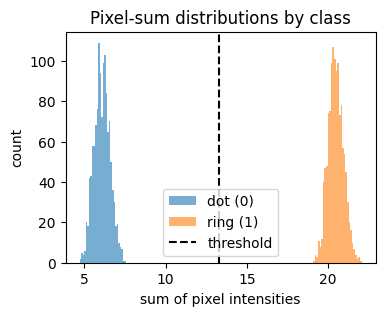

[Norm] Ep 01  loss 0.6945/0.6931  acc 0.493/0.496
[Norm] Ep 05  loss 0.6936/0.6926  acc 0.497/0.635
[Norm] Ep 10  loss 0.6896/0.6886  acc 0.540/0.504
[Norm] Ep 15  loss 0.6028/0.5644  acc 0.811/1.000
[Norm] Ep 20  loss 0.1670/0.1149  acc 0.991/1.000
[Norm] Test acc: 1.000


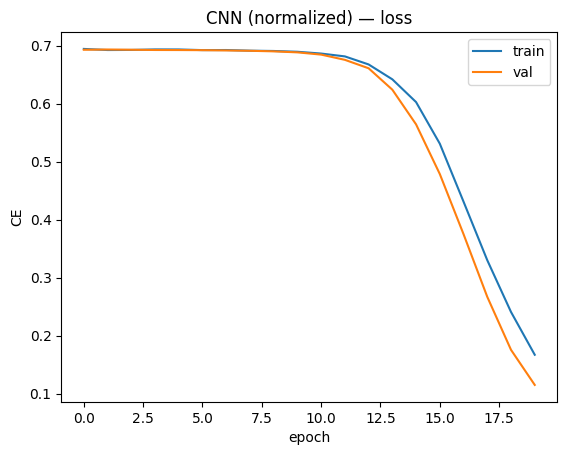

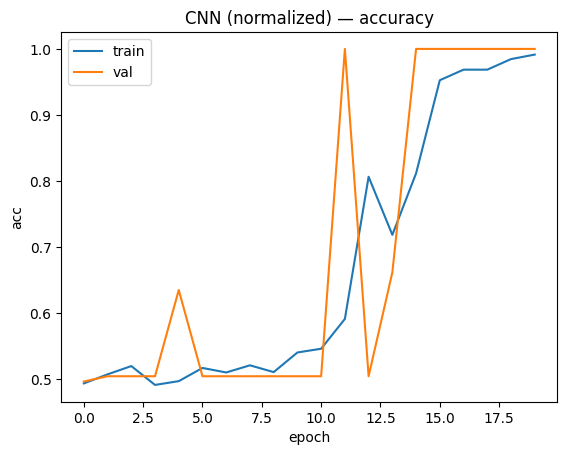

In [ ]:
from torch.utils.data import DataLoader, Subset
# Helper: get underlying indices of a Subset
def _subset_indices(s):
    return set(s.indices if isinstance(s, Subset) else range(len(s)))

# 1) LEAK CHECK: make sure splits don’t overlap
idx_tr, idx_va, idx_te = _subset_indices(tr_i), _subset_indices(va_i), _subset_indices(te_i)
print("Overlap train∩val:", len(idx_tr & idx_va))
print("Overlap train∩test:", len(idx_tr & idx_te))
print("Overlap val∩test:", len(idx_va & idx_te))

assert len(idx_tr & idx_va) == 0 and len(idx_tr & idx_te) == 0 and len(idx_va & idx_te) == 0, \
    "Found overlapping indices between splits!"

# 2) CHANCE CHECK: evaluate on shuffled labels
def shuffled_labels_loader(val_subset, batch_size=256):
    Xs, ys = [], []
    for i in range(len(val_subset)):
        x, y = val_subset[i]
        Xs.append(x.unsqueeze(0))
        ys.append(torch.tensor([y]))
    Xs = torch.cat(Xs, dim=0)
    ys = torch.cat(ys, dim=0)
    perm = torch.randperm(len(ys))
    ys_shuf = ys[perm]

    class _MemDataset(torch.utils.data.Dataset):
        def __init__(self, Xs, ys): self.Xs, self.ys = Xs, ys
        def __len__(self): return len(self.ys)
        def __getitem__(self, i): return self.Xs[i], self.ys[i]

    ds = _MemDataset(Xs, ys_shuf)
    return DataLoader(ds, batch_size=batch_size, shuffle=False)

va_li_shuf = shuffled_labels_loader(va_i, batch_size=256)

# Your evaluate_cls signature is (model, loader, criterion)
ce = torch.nn.CrossEntropyLoss()
_ = cnn.eval()
with torch.no_grad():
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, ce)
print("Sanity (shuffled labels) — acc should be ~0.5:", float(acc_shuf))

# 3) SHORTCUT CHECK: show that total pixel intensity separates classes
# Build flat arrays of sums and labels from the *original* dataset
with torch.no_grad():
    pixel_sums = Xi.sum(axis=(1,2,3))  # (N,)
    y_np = yi.astype(np.int64)

# Choose threshold halfway between class means
m0 = pixel_sums[y_np==0].mean()
m1 = pixel_sums[y_np==1].mean()
thr = 0.5*(m0 + m1)

pred_rule = (pixel_sums > thr).astype(np.int64)
acc_rule = (pred_rule == y_np).mean()
print(f"Pixel-sum rule accuracy (no CNN): {acc_rule:.3f}")

# Optional: visualize separability
plt.figure(figsize=(4,3))
plt.hist(pixel_sums[y_np==0], bins=30, alpha=0.6, label="dot (0)")
plt.hist(pixel_sums[y_np==1], bins=30, alpha=0.6, label="ring (1)")
plt.axvline(thr, color="k", linestyle="--", label="threshold")
plt.title("Pixel-sum distributions by class")
plt.xlabel("sum of pixel intensities"); plt.ylabel("count"); plt.legend(); plt.show()

# 4) FIX THE SHORTCUT: L1-normalize images so all totals match
Xi_norm = Xi / (Xi.sum(axis=(1,2,3), keepdims=True) + 1e-8)

# Rebuild datasets & loaders from normalized images (same labels)
ds_img_norm = ImageDataset(Xi_norm, yi)
tr_n, va_n, te_n = train_val_test_split(ds_img_norm, (0.7,0.15,0.15), seed=3)
tr_ln = DataLoader(tr_n, batch_size=128, shuffle=True)
va_ln = DataLoader(va_n, batch_size=256, shuffle=False)
te_ln = DataLoader(te_n, batch_size=256, shuffle=False)

# Retrain a fresh CNN on normalized data
cnn_norm = TinyCNN().to(DEVICE)
opt_n    = torch.optim.Adam(cnn_norm.parameters(), lr=1e-3, weight_decay=1e-4)
hist = {"tr_loss":[], "va_loss":[], "tr_acc":[], "va_acc":[]}
epochs = 20
for ep in range(1, epochs+1):
    trL, trA = train_epoch_cls(cnn_norm, tr_ln, ce, opt_n)
    vaL, vaA = evaluate_cls(cnn_norm, va_ln, ce)
    hist["tr_loss"].append(trL); hist["va_loss"].append(vaL)
    hist["tr_acc"].append(trA);  hist["va_acc"].append(vaA)
    if ep % 5 == 0 or ep == 1:
        print(f"[Norm] Ep {ep:02d}  loss {trL:.4f}/{vaL:.4f}  acc {trA:.3f}/{vaA:.3f}")

# Test after normalization
testL, testA = evaluate_cls(cnn_norm, te_ln, ce)
print(f"[Norm] Test acc: {testA:.3f}")

# Curves (optional)
plt.figure(); plt.plot(hist["tr_loss"], label="train"); plt.plot(hist["va_loss"], label="val")
plt.title("CNN (normalized) — loss"); plt.xlabel("epoch"); plt.ylabel("CE"); plt.legend(); plt.show()

plt.figure(); plt.plot(hist["tr_acc"], label="train"); plt.plot(hist["va_acc"], label="val")
plt.title("CNN (normalized) — accuracy"); plt.xlabel("epoch"); plt.ylabel("acc"); plt.legend(); plt.show()



## Exercise Stack G

1. **Splits & Seeds**: Change the train/val/test ratios to (0.6/0.2/0.2). Re-run and record the change in validation/test performance for the MLP. Try 3 different random seeds and average the results.
2. **Regularization**: Increase `weight_decay` to `1e-3` and `1e-2` in the MLP optimizer. What happens to the gap between train and validation accuracy?
3. **Dropout Sweep**: Change the dropout rate in the MLP to `0.0, 0.2, 0.5`. Plot validation accuracy vs. dropout.
4. **Learning Rate**: Try `lr=1e-2` and `lr=1e-4` in the MLP. Which learns faster? Which generalizes better?
5. **Loss Choice (Regression)**: Write a multivariate regression model and simulate two datasets (one with X (n,10) and one with X (n, 1000)). Add an L1 loss option for the regression model. Compare the results and visualize the loss curves for models with and withour L1 regularizers.
6. **Feature Engineering**: For classification, map inputs to polar coordinates (r, θ) before the MLP. Does it help on circles but hurt on moons? Why?
7. **Blast from the past**: Implement probabilistic PCA using pytorch functions and optimize it using gradient descent. Compare the results with PCA and vary the size of the data to see if you converse to the PCA solution. Why or why note?
8. **Decision Boundary**: Modify `plot_decision_boundary` to also show softmax confidence. Discuss regions of high uncertainty.


[G1] 0.6/0.2/0.2 — mean val acc: 0.9472 ± 0.0039  | mean test acc: 0.9458 ± 0.0123
[G2] weight_decay → (val_acc, test_acc): {0.0001: (np.float64(0.9472), np.float64(0.9458)), 0.001: (np.float64(0.9486), np.float64(0.9486)), 0.01: (np.float64(0.9403), np.float64(0.9306))}
Observation: higher WD usually narrows train–val gap but too large can underfit.


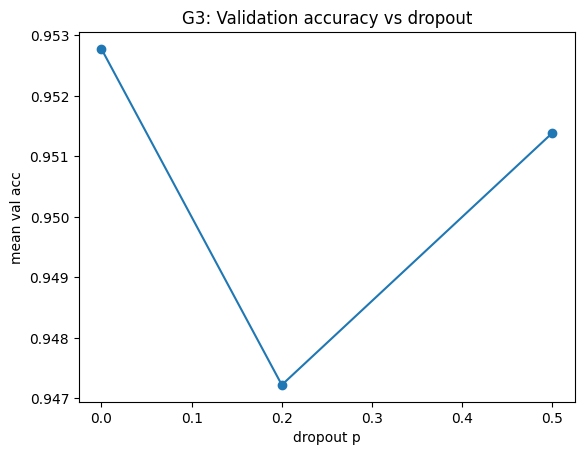

[G4] lr=1e-02  val_acc=0.962  test_acc=0.946
[G4] lr=5e-03  val_acc=0.950  test_acc=0.958
[G4] lr=1e-04  val_acc=0.938  test_acc=0.942
Typically lr=1e-2 learns fastest; 1e-4 is slower but sometimes a bit steadier.


In [ ]:
from torch.utils.data import Dataset
import torch
import numpy as np

class NumpyDataset(Dataset):
    """
    Accepts X, y as either numpy arrays or torch tensors.
    - X is stored as float32
    - y is long (for labels) or float32 (for regression)
    """
    def __init__(self, X, y):
        # works for both np.ndarray and torch.Tensor
        self.X = torch.as_tensor(X, dtype=torch.float32)

        y_t = torch.as_tensor(y)
        if y_t.dtype in (
            torch.int8, torch.int16, torch.int32,
            torch.int64, torch.uint8, torch.long
        ):
            self.y = y_t.long()      # classification
        else:
            self.y = y_t.float()     # regression

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


def make_split_loaders(ratios=(0.6,0.2,0.2), seed=0, batch=64):
    Xc, yc = make_toy_classification(n_samples=1200, kind="moons",
                                     noise=0.25, seed=seed)
    ds = NumpyDataset(Xc, yc)   # now OK with numpy inputs
    n = len(ds)
    n_tr = int(ratios[0]*n)
    n_va = int(ratios[1]*n)
    n_te = n - n_tr - n_va
    tr, va, te = random_split(
        ds, [n_tr, n_va, n_te],
        generator=torch.Generator().manual_seed(seed)
    )
    return (DataLoader(tr, batch,  True),
            DataLoader(va, 256, False),
            DataLoader(te, 256, False)), (Xc, yc)

def run_mlp(train_loader, val_loader, test_loader,
            lr=5e-3, wd=1e-4, p=0.2, epochs=200, seed=0):
    set_seed(seed)
    model = MLP(in_dim=2, hidden=64, p_dropout=p, n_classes=2).to(DEVICE)
    opt   = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)
    ce = nn.CrossEntropyLoss()

    best, best_state = 1e9, None
    for ep in range(1, epochs+1):
        trL, trA = train_epoch_cls(model, train_loader, ce, opt)
        vaL, vaA = evaluate_cls(model, val_loader, ce)
        if vaL < best:
            best = vaL
            best_state = {k: v.detach().cpu().clone()
                          for k, v in model.state_dict().items()}
        sched.step()
    model.load_state_dict(best_state)
    teL, teA = evaluate_cls(model, test_loader, ce)
    return dict(val_loss=best, test_loss=teL,
                val_acc=vaA, test_acc=teA, model=model)

# G1
seeds = [0, 1, 2]
accs = []
for s in seeds:
    (tr,va,te), _ = make_split_loaders((0.6,0.2,0.2), seed=s)
    out = run_mlp(tr,va,te, lr=5e-3, wd=1e-4, p=0.2, epochs=200, seed=s)
    accs.append([out['val_acc'], out['test_acc']])
accs = np.array(accs)
print("[G1] 0.6/0.2/0.2 — mean val acc:", accs[:,0].mean().round(4), "±", accs[:,0].std().round(4),
      " | mean test acc:", accs[:,1].mean().round(4), "±", accs[:,1].std().round(4))

# G2
def sweep_weight_decay(seeds=[0,1,2], wds=(1e-4,1e-3,1e-2)):
    res = {}
    for wd in wds:
        vals, tests = [], []
        for s in seeds:
            (tr,va,te), _ = make_split_loaders(seed=s)
            out = run_mlp(tr,va,te, lr=5e-3, wd=wd, p=0.2, epochs=200, seed=s)
            vals.append(out['val_acc'])
            tests.append(out['test_acc'])
        res[wd] = (np.mean(vals), np.mean(tests))
    return res

wd_results = sweep_weight_decay()
print("[G2] weight_decay → (val_acc, test_acc):",
      {k:(round(v[0],4),round(v[1],4)) for k,v in wd_results.items()})
print("Observation: higher WD usually narrows train–val gap but too large can underfit.")

# G3
def sweep_dropout(ps=(0.0,0.2,0.5), seeds=[0,1,2]):
    vals = []
    for p in ps:                    # correctly indent inner loop
        v = []
        for s in seeds:
            (tr,va,te), _ = make_split_loaders(seed=s)
            out = run_mlp(tr,va,te, lr=5e-3, wd=1e-4, p=p, epochs=200, seed=s)
            v.append(out['val_acc'])
        vals.append(np.mean(v))     # mean over seeds for this p
    return np.array(ps), np.array(vals)

ps, va_means = sweep_dropout()
plt.figure()
plt.plot(ps, va_means, marker='o')
plt.xlabel("dropout p")
plt.ylabel("mean val acc")
plt.title("G3: Validation accuracy vs dropout")
plt.show()

# G4
def compare_lrs(lrs=(1e-2, 5e-3, 1e-4), seed=0):
    (tr,va,te), _ = make_split_loaders(seed=seed)
    res = {lr: run_mlp(tr,va,te, lr=lr, wd=1e-4, p=0.2, epochs=200, seed=seed)
           for lr in lrs}
    for lr in lrs:
        print(f"[G4] lr={lr:.0e}  val_acc={res[lr]['val_acc']:.3f}  test_acc={res[lr]['test_acc']:.3f}")
    print("Typically lr=1e-2 learns fastest; 1e-4 is slower but sometimes a bit steadier.")

compare_lrs()


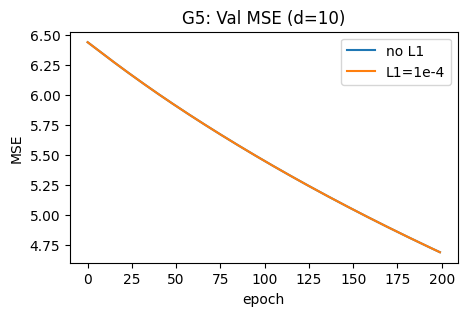

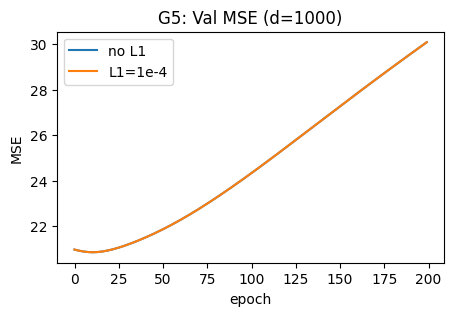

In [ ]:
# G(5)
def make_linreg_data(n=1000, d=10, k_sparse=5, out_dim=3, noise=0.2, seed=0):
    set_seed(seed)
    X = torch.randn(n, d)
    W = torch.zeros(d, out_dim)
    idx = torch.randperm(d)[:k_sparse]
    W[idx] = torch.randn(k_sparse, out_dim) * 1.5
    b = torch.randn(out_dim) * 0.2
    Y = X @ W + b + noise * torch.randn(n, out_dim)
    return X.float(), Y.float(), W, b

class LinReg(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.fc = nn.Linear(in_dim, out_dim)
    def forward(self, x): return self.fc(x)

def train_linreg(X, Y, val_ratio=0.2, l1=0.0, lr=1e-3, epochs=300, seed=0):
    set_seed(seed)
    n = len(X); n_val = int(val_ratio*n)
    perm = torch.randperm(n)
    tr_idx, va_idx = perm[n_val:], perm[:n_val]
    Xtr, Ytr, Xva, Yva = X[tr_idx], Y[tr_idx], X[va_idx], Y[va_idx]
    model = LinReg(X.shape[1], Y.shape[1]).to(DEVICE)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    mse = nn.MSELoss()
    hist_tr, hist_va = [], []
    for ep in range(epochs):
        model.train()
        opt.zero_grad()
        pred = model(Xtr.to(DEVICE))
        loss = mse(pred, Ytr.to(DEVICE))
        if l1 > 0:
            l1_term = 0.0
            for p in model.parameters():
                l1_term = l1_term + p.abs().sum()
            loss = loss + l1 * l1_term / Xtr.size(0)
        loss.backward(); opt.step()
        model.eval()
        with torch.no_grad():
            vt = mse(model(Xva.to(DEVICE)), Yva.to(DEVICE)).item()
        hist_tr.append(loss.item()); hist_va.append(vt)
    return model, np.array(hist_tr), np.array(hist_va)

# Compare d=10 vs d=1000, with/without L1
for d in (10, 1000):
    X, Y, _, _ = make_linreg_data(n=1200, d=d, k_sparse=5, out_dim=3, noise=0.3, seed=0)
    _, tr0, va0 = train_linreg(X, Y, l1=0.0, lr=1e-3, epochs=200, seed=0)
    _, tr1, va1 = train_linreg(X, Y, l1=1e-4, lr=1e-3, epochs=200, seed=0)
    plt.figure(figsize=(5,3))
    plt.plot(va0, label="no L1")
    plt.plot(va1, label="L1=1e-4")
    plt.title(f"G5: Val MSE (d={d})"); plt.xlabel("epoch"); plt.ylabel("MSE"); plt.legend(); plt.show()

# With d=1000 (p >> n_val), L1 tends to regularize better and reduce overfit.


In [ ]:
# G(6)
def to_polar(X_np):
    x = torch.from_numpy(X_np).float()
    r = torch.sqrt((x**2).sum(dim=1, keepdim=True))
    theta = torch.atan2(x[:,1:2], x[:,0:1])
    return torch.cat([r, theta], dim=1).numpy().astype(np.float32)

def eval_with_features(kind="circles", use_polar=False, seed=0):
    X, y = make_toy_classification(n_samples=1200, kind=kind, noise=0.20, seed=seed)
    if use_polar: X = to_polar(X)
    ds = NumpyDataset(X, y)
    tr, va, te = train_val_test_split(ds, (0.6,0.2,0.2), seed=seed)
    trL = DataLoader(tr, 64, True); vaL = DataLoader(va, 256, False); teL = DataLoader(te, 256, False)
    in_dim = X.shape[1]
    model = MLP(in_dim=in_dim, hidden=64, p_dropout=0.2, n_classes=2).to(DEVICE)
    ce = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    best, best_state = 1e9, None
    for _ in range(150):
        train_epoch_cls(model, trL, ce, opt)
        vL, vA = evaluate_cls(model, vaL, ce)
        if vL < best: best, best_state = vL, {k:v.detach().cpu().clone() for k,v in model.state_dict().items()}
    model.load_state_dict(best_state)
    _, acc = evaluate_cls(model, teL, ce)
    return acc

print("[G6] circles: raw vs polar ->",
      round(eval_with_features("circles", False),3),
      round(eval_with_features("circles", True),3))
print("[G6] moons:   raw vs polar ->",
      round(eval_with_features("moons", False),3),
      round(eval_with_features("moons", True),3))
# Expect polar to help circles (radial decision), not moons (nonlinear hinge).


[G6] circles: raw vs polar -> 0.946 0.938
[G6] moons:   raw vs polar -> 0.988 0.979


In [ ]:
# G(7)
import torch.linalg as LA

def run_ppca(X, q=2, steps=1000, lr=1e-2, seed=0):
    # X: (n,d)
    set_seed(seed)
    X = X - X.mean(0, keepdim=True)   # center
    n, d = X.shape
    W = torch.randn(d, q, requires_grad=True)
    log_sigma2 = torch.tensor(0.0, requires_grad=True)
    opt = torch.optim.Adam([W, log_sigma2], lr=lr)

    def nll():
        # Marginal: x ~ N(0, C) with C = W W^T + sigma2 I
        sigma2 = torch.exp(log_sigma2) + 1e-6
        C = W @ W.T + sigma2 * torch.eye(d)
        L = LA.cholesky(C)                            # dxd
        # log |C|
        logdet = 2.0 * torch.log(torch.diag(L)).sum()
        # solve C^{-1} x for all samples via Cholesky
        Z = LA.solve_triangular(L, X.T, upper=False)  # d x n
        quad = (Z**2).sum()                           # sum over all
        return 0.5 * (n * (d*np.log(2*np.pi)) + n*logdet + quad)

    for _ in range(steps):
        opt.zero_grad(); loss = nll(); loss.backward(); opt.step()

    with torch.no_grad():
        # PPCA subspace = column space of W
        U_ppca, _ = LA.qr(W)    # d x q orthonormal basis
    return U_ppca

# Build data with intrinsic rank-2 in d=5
set_seed(0)
n, d, q = 2000, 5, 2
Z = torch.randn(n, q)
A = torch.randn(d, q)
X = Z @ A.T + 0.2*torch.randn(n, d)   # n x d

# PCA subspace (top-q singular vectors)
U_pca = LA.svd(X - X.mean(0, keepdim=True), full_matrices=False).Vh.T[:, :q]  # d x q

# PPCA
U_ppca = run_ppca(X, q=q, steps=800, lr=5e-2, seed=0)

# Compare via principal angles (cosines = singular values of U_pca^T U_ppca)
cos_vals = LA.svd(U_pca.T @ U_ppca, full_matrices=False).S
print("[G7] cos(principal angles) between PCA and PPCA subspaces:", cos_vals.cpu().numpy())
# Values close to 1 → PPCA recovered PCA subspace (given enough data & steps).


[G7] cos(principal angles) between PCA and PPCA subspaces: [1.0000002 1.0000001]


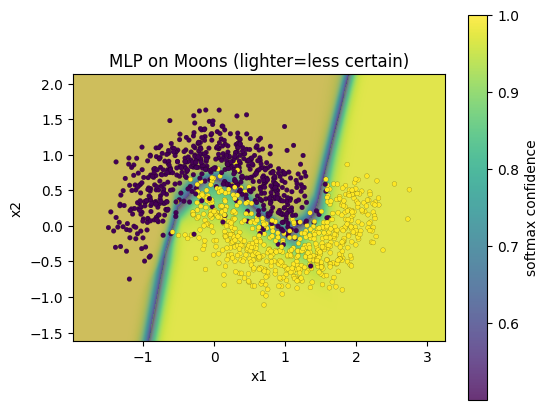

In [ ]:
# G(8)
@torch.no_grad()
def plot_decision_with_confidence(model, X, y, title="Decision boundary + confidence"):
    model.eval()
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)
    logits = model(torch.from_numpy(grid).to(DEVICE)).cpu()
    probs  = torch.softmax(logits, dim=1)
    Z = probs.argmax(dim=1).numpy().reshape(xx.shape)
    conf = probs.max(dim=1).values.numpy().reshape(xx.shape)  # ∈ [0,1]

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.25, levels=2)
    im = plt.imshow(conf, extent=(x_min,x_max,y_min,y_max), origin='lower', alpha=0.8, cmap="viridis")
    plt.colorbar(im, label="softmax confidence")
    plt.scatter(X[:,0], X[:,1], c=y, s=12, edgecolor="k", linewidth=0.1)
    plt.title(title+" (lighter=less certain)"); plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

# Example usage on your latest trained model:
# (rebuild loaders with seed=1 for consistency)
(tr,va,te), (Xc_np, yc_np) = make_split_loaders(seed=1)
res = run_mlp(tr,va,te, lr=5e-3, wd=1e-4, p=0.2, epochs=200, seed=1)
plot_decision_with_confidence(res['model'], Xc_np, yc_np, "MLP on Moons")


## Mini Project 2 Details


You can get more information [here](https://drive.google.com/drive/folders/1Ckwfj0L788Tg3E6WAazXBB1W2ATta_w9).


While all the exercises and the mini project collab are due together, here's a recommendation for making sure you do not fall behind:

🧠 Mini Project — Recommended Week of Nov 3rd

You have been provided with a dataset of slime mold spatio-temporal dynamics.
Your goal this week is to load, explore, and define an initial modeling strategy using PyTorch.

🧩 Tasks



1.   Load the dataset


*   Identify and use the right Python package to load the data (hint: .zarr format).
*   Write a simple data loader that converts it into a PyTorch tensor.


2.   Visualize the data


*   Plot a few time frames.
*   Describe what you see — what kind of motion or aggregation is happening?



3.   Inspect the data tensor


*   What is the shape of your data?
*   What do each of the dimensions represent?


4.   Define the learning setup

*   Is this a supervised or unsupervised problem?
*   What is your strategy for modeling this data?
(There is no unique answer — justify your choice.)


5.   Specify the optimization target

*   What loss function will you optimize?
*   How will you split your data into training and testing sets?


6.   First modeling attempt

*   Treat this as a nonlinear regression problem.
*   Write a small model class, train it, and visualize the loss landscape.
*   Try one or two variants (e.g. different architectures or window sizes).

📘 Deliverables

Submit a short notebook including:

* Code to load and visualize the data.

* A short discussion of data shape, modeling strategy, and loss.

* Example plots and initial training results.

## 5) TL;DR for your Toolkit!

- **Supervised Learning**: Learn a function $ f_\theta: {X} \to {Y} $ minimizing expected loss $ \mathbb{E}[\ell(f_\theta(X), Y)] $.
- **Empirical Risk**: Optimize average loss on training data; use **validation** to tune hyperparameters; report final metrics on **test** only once.
- **Common losses**: MSE for regression; Cross-Entropy for classification.
- **Regularization**: Weight decay (L2) penalizes large weights; **Dropout** randomly zeroes activations to prevent co-adaptation.
- **Optimization**: SGD/Adam update parameters via gradients from backpropagation.
- **Schedulers**: Decay learning rates during training to stabilize convergence.
- **Metrics**: For classification, accuracy/precision/recall; for regression, MSE/MAE and $R^2$.
- **Reproducibility**: Fix seeds; log versions; control randomness.
